In [3]:
# from xerparser.reader import Reader
import pandas as pd
import numpy as np
from icecream import ic

# Other Sheets


In [1]:
PATH = "../../Documents/cee240_p6/CEE240F22_A.xlsx"


In [6]:
df01 = pd.read_excel(PATH, sheet_name=1, engine="openpyxl" )
df01.head(3)

/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,pred_task_id,task_id,pred_type,PREDTASK__status_code,TASK__status_code,pred_proj_id,proj_id,predtask__projwbs__wbs_full_name,task__projwbs__wbs_full_name,predtask__task_name,task__task_name,delete_record_flag
0,Predecessor,Successor,Relationship Type,(*)Predecessor Activity Status,(*)Successor Activity Status,(*)Predecessor Project,(*)Successor Project,(*)Predecessor WBS,(*)Successor WBS,(*)Predecessor Activity Name,(*)Successor Activity Name,Delete This Row
1,P1B1000,P1B1010,FS,Not Started,Not Started,CEE240F22,CEE240F22,CEE240F22.Inc01 Increment01,CEE240F22.Inc01 Increment01,NTP,submit shut down request for facilities,NaN
2,P1B1010,P1B1020,FS,Not Started,Not Started,CEE240F22,CEE240F22,CEE240F22.Inc01 Increment01,CEE240F22.Inc01 Increment01,submit shut down request for facilities,"demo ceilings GL 6.5, M.4",NaN


In [5]:
df02 = pd.read_excel(PATH, sheet_name=2, engine="openpyxl" )
df02

/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,user_data
0,UserSettings Do Not Edit
1,DurationQtyType=QT_Hour\nShowAsPercentage=0\nS...


# Durations

In [42]:
df = pd.read_excel(PATH, sheet_name=0, engine="openpyxl", skiprows=[1] )
df.rename(columns={"target_drtn_hr_cnt": "duration", "total_float_hr_cnt": "float"}, inplace=True)
df.tail()

/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,task_code,status_code,wbs_id,float,end_date,start_date,duration,task_name,delete_record_flag
177,C1010,Not Started,CEE240F22.Inc02.Courtyard,29,2023-12-07 16:00:00,2023-11-30 08:00:00,6,install concrete paving Courtyard,NaN
178,C1020,Not Started,CEE240F22.Inc02.Courtyard,29,2023-12-11 16:00:00,2023-12-08 08:00:00,2,protect trees Courtyard,NaN
179,C1030,Not Started,CEE240F22.Inc02.Courtyard,29,2023-12-18 16:00:00,2023-12-12 08:00:00,5,install light fixtures Courtyard,NaN
180,C1040,Not Started,CEE240F22.Inc02.Courtyard,29,2023-12-26 16:00:00,2023-12-19 08:00:00,6,install resin paving Courtyard,NaN
181,C1050,Not Started,CEE240F22.Inc02.Courtyard,29,2024-01-02 16:00:00,2023-12-27 08:00:00,5,install courtyard furnishings Courtyard,NaN


<AxesSubplot: >

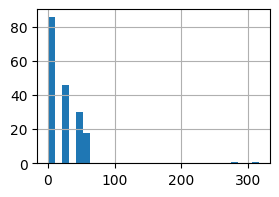

In [48]:
df.float.hist(bins=30, figsize=(3,2))

In [31]:
# current duration -> shld do start and end..
curr_dur_days = df["duration"].sum()
curr_dur_days

753

In [9]:
# need to shave off 14 + 24 days + 30 days contingency 
shave_days = 30 + 24 + 14
ic(shave_days)
ic(curr_dur_days - shave_days)

ic| shave_days: 68
ic| curr_dur_days - shave_days: 685


685

In [43]:
def adjust_dur(row):
    "used in an apply function with the df whose columns matches the row selections"
    val = row.duration
    if row.float <=50 and row.duration > 1:
        val = np.round(row.duration - row.duration * 0.10)
    return val
            

In [44]:
df["duration"] = df.apply(lambda row: adjust_dur(row), axis=1)

In [14]:
# df["duration"] = df.apply(lambda row: row.duration - 1 if row.float <=2 else row.duration, axis=1)

In [45]:
df["duration"].sum()

686.0

In [46]:
df["duration"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  7., 12.,  9., 14.,  5.])

# Export 

In [16]:
with pd.ExcelWriter("outputs/OUT_CEE240F22_Nov13.xlsx") as writer: 
    df.to_excel(writer, sheet_name="TASK", index=False)
    df01.to_excel(writer, sheet_name="TASKPRED", index=False)
    df02.to_excel(writer, sheet_name="USERDATA", index=False)

In [47]:
# readable by P6
with pd.ExcelWriter("../../Documents/cee240_p6/OUT_CEE240F22_Nov13.xlsx") as writer: 
    df.to_excel(writer, sheet_name="TASK", index=False)
    df01.to_excel(writer, sheet_name="TASKPRED", index=False)
    df02.to_excel(writer, sheet_name="USERDATA", index=False)

In [ ]:
# TODO if needed, reinsert the label row from the excel sheet ...